# Accuracy Metric Uncertainty

This notebook provides an example how Probatus can be used to estimate the uncertainty around the accuracy metric of a given model.

In [1]:
import numpy as np
from probatus.metric_uncertainty import VolatilityEstimation
from probatus.datasets import lending_club
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

### Loading Data

For the example we use the lending club data that is already provided in Probatus and we will build a model and investigate the uncertainty around the AUC.

In [2]:
# Load data and build the model
data = lending_club(modelling_mode = False)[0]
y = data[['default']]
X = data.drop(['id', 'loan_issue_date','default'], axis = 1)

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=6,
                               max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                               oob_score=False, random_state=0, verbose=0, warm_start=False)

model.fit(X, y)

# defining the metrics we are interested in
evaluators =  {'AUC' : [roc_auc_score,'proba']}

/Users/pq71mm/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


### Running Uncertainty Evaluation

#### Bootstrap replicates

First fitting the localised bootstrap replicates with overlap

In [3]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_seed')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.4,1000)

The uncertainty is provided in term of the standard deviation.

In [5]:
checker.reporting('AUC')

Mean of metric on train is 0.92
Mean of metric on test is 0.71
Mean of delta is 0.21
Standard Deviation of metric on train is 0.00963
Standard Deviation of metric on test is 0.01924
Standard Deviation of delta is 0.02249


and histograms allow to see the differences between the train and the test sets.

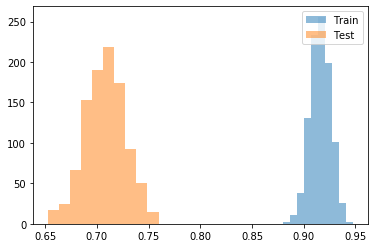

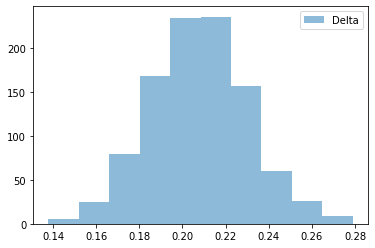

In [6]:
checker.plot('AUC')

#### Global bootrap non overlapping k folds

The number of max folds is determined by the nature of the data: what is the maximum number of folds to ensure there is balanced number of classed in each fold.

In [7]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'boot_global')

# running 1000 random samples with 40% of data assigned to test partition
checker.estimate(0.1)

In [8]:
checker.reporting('AUC')

Mean of metric on train is 0.98
Mean of metric on test is 0.73
Mean of delta is 0.24
Standard Deviation of metric on train is 3e-05
Standard Deviation of metric on test is 0.00079
Standard Deviation of delta is 0.00093


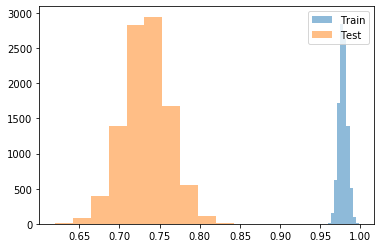

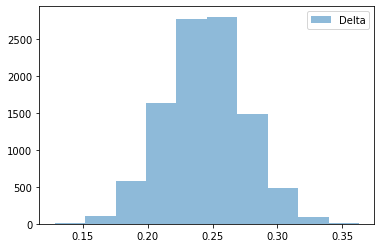

In [9]:
checker.plot('AUC')

#### DeLong approach (experimental)

In [10]:
# declaring the evaluation class
checker = VolatilityEstimation(model, X, y, evaluators, 'delong')

checker.estimate(0.4)

In [11]:
checker.reporting('AUC')

Mean of metric on train is 0.91
Mean of metric on test is 0.7
Mean of delta is 0.21
Standard Deviation of metric on train is 0.00019
Standard Deviation of metric on test is 0.00068
Standard Deviation of delta is 0.0


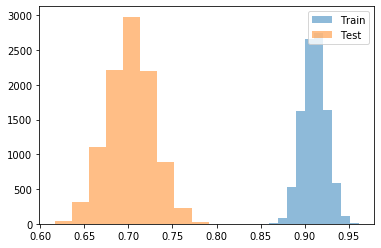

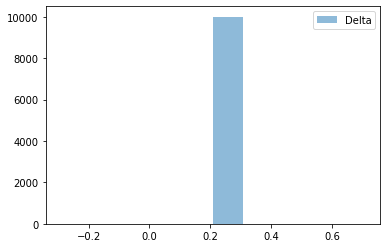

In [12]:
checker.plot('AUC')